In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [8]:
path = 'data/processed_data/coded_data/*.csv'

frames = []

# Process each file in chunks
for fname in glob.glob(path):
    chunks = pd.read_csv(fname, chunksize=500000)  
    for chunk in chunks:
        frames.append(chunk)

all_data = pd.concat(frames)

print("Data successfully loaded in chunks.")


Data successfully loaded in chunks.


In [ ]:
# Column Filtering

X_fair = all_data[['as_of_year', 'loan_type',
       'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'applicant_income_000s', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']]

y = all_data['loan_approval']

In [ ]:
print(X_fair.isnull().any())

as_of_year                        False
loan_type                         False
owner_occupancy                   False
loan_amount_000s                  False
preapproval                       False
applicant_income_000s             False
hud_median_family_income          False
tract_to_msamd_income             False
number_of_owner_occupied_units    False
number_of_1_to_4_family_units     False
dtype: bool


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fair, y, test_size=0.3, random_state=42, stratify=y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.24      0.60      0.34     18738
         1.0       0.85      0.56      0.67     79161

    accuracy                           0.56     97899
   macro avg       0.55      0.58      0.51     97899
weighted avg       0.74      0.56      0.61     97899

Precision-Recall AUC: 0.8580237736187633


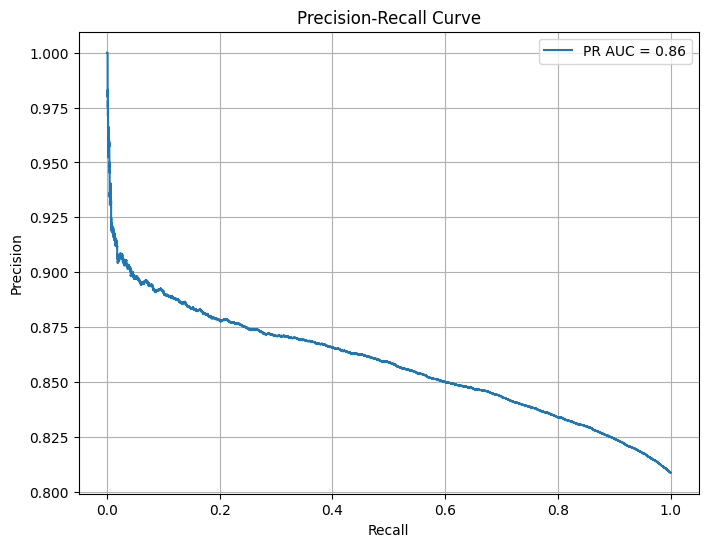

In [17]:
# Logistic Regression:

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for Precision-Recall

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.52      0.38     18738
         1.0       0.86      0.70      0.77     79161

    accuracy                           0.67     97899
   macro avg       0.58      0.61      0.57     97899
weighted avg       0.75      0.67      0.70     97899

Precision-Recall AUC: 0.8782941318983661


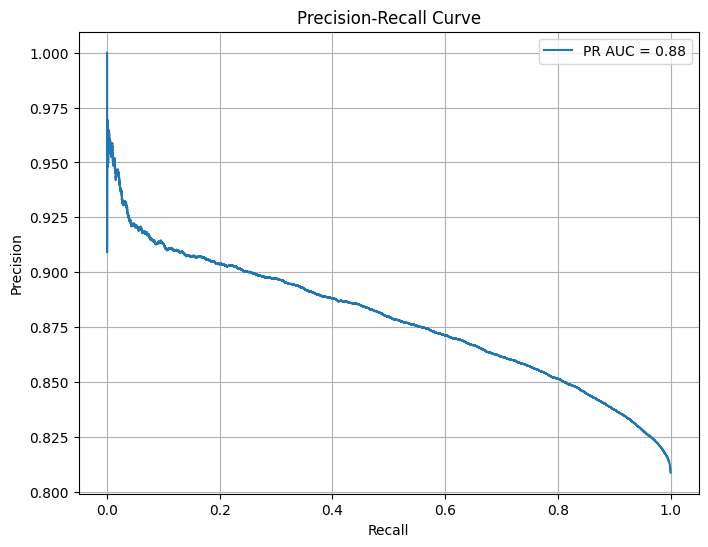

In [18]:
# Train a simple Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=15, # Maximum depth of each tree (adjustable)
    min_samples_split=5, 
    min_samples_leaf=2,
    class_weight={0: 5, 1: 1}, # Higher weight for minority class
    random_state=42    # For reproducibility
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for Precision-Recall

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

**Fairer Model**

In [ ]:
# Column Filtering

X_unfair = all_data[['as_of_year', 'loan_type',
       'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'applicant_income_000s', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_sex', 'minority_population']]


In [30]:
print(X_unfair.isnull().any())

as_of_year                        False
loan_type                         False
owner_occupancy                   False
loan_amount_000s                  False
preapproval                       False
applicant_income_000s             False
hud_median_family_income          False
tract_to_msamd_income             False
number_of_owner_occupied_units    False
number_of_1_to_4_family_units     False
applicant_ethnicity               False
co_applicant_ethnicity            False
applicant_race_1                  False
applicant_sex                     False
minority_population               False
dtype: bool


In [31]:
print(X_unfair.dtypes)

as_of_year                          int64
loan_type                           int64
owner_occupancy                     int64
loan_amount_000s                    int64
preapproval                         int64
applicant_income_000s             float64
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
applicant_ethnicity                 int64
co_applicant_ethnicity              int64
applicant_race_1                    int64
applicant_sex                       int64
minority_population               float64
dtype: object


In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_unfair, y, test_size=0.3, random_state=42, stratify=y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.57      0.34     18738
         1.0       0.85      0.59      0.70     79161

    accuracy                           0.58     97899
   macro avg       0.55      0.58      0.52     97899
weighted avg       0.74      0.58      0.63     97899

Precision-Recall AUC: 0.858301896590884


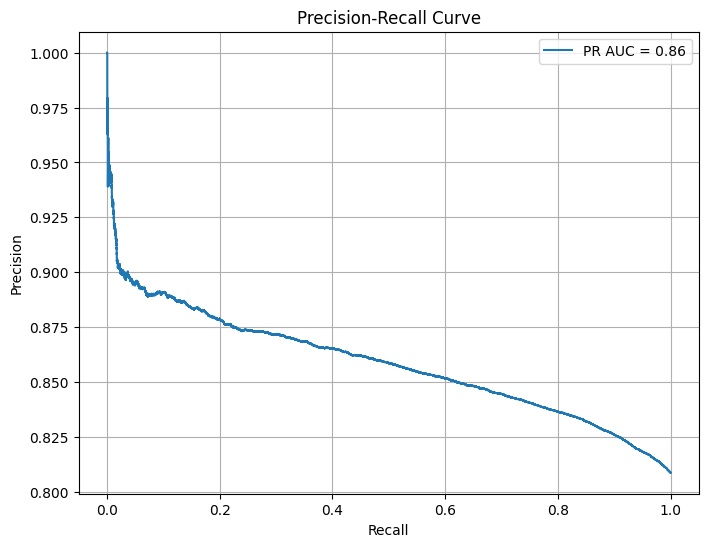

In [35]:
# Logistic Regression:

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for Precision-Recall

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.30      0.55      0.38     18738
         1.0       0.87      0.69      0.77     79161

    accuracy                           0.67     97899
   macro avg       0.58      0.62      0.58     97899
weighted avg       0.76      0.67      0.70     97899

Precision-Recall AUC: 0.8826328622667446


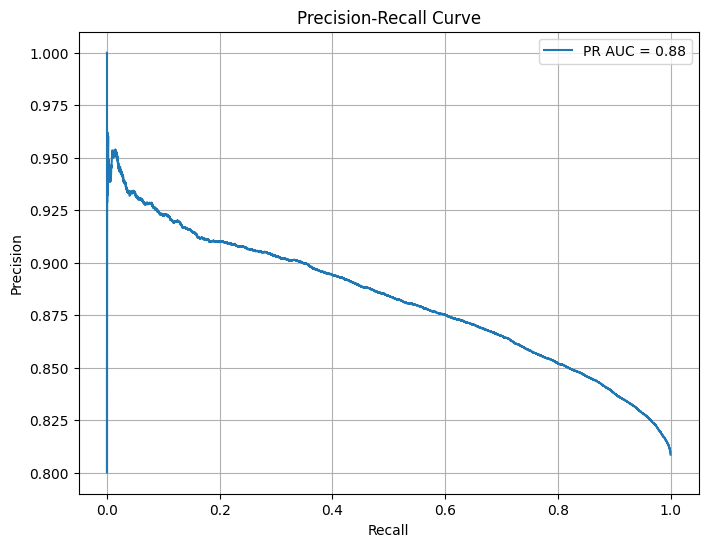

In [ ]:
# Train a simple Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=15, # Maximum depth of each tree (adjustable)
    min_samples_split=5, 
    min_samples_leaf=2,
    class_weight={0: 5, 1: 1}, # Higher weight for minority class
    random_state=42    # For reproducibility
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for Precision-Recall

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()